SHARE MARKET PRiCE PREDICTION

In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# import scikit lean libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
df = pd.read_csv("ShareMarketData (1).csv")

In [55]:
df.head()

,Symbol,LTP,%Change,Open,High,Low,Qty,PClose,Diff
0,ACLBSL,990,0.00,990,990,981,"1,482",990,0.0
1,ADBL,296.6,-0.77,302,302,295,"24,934",298.9,-2.3
2,AHL,633.1,2.78,628.3,652,612.09,"27,721",616,17.1
3,AHPC,279.6,-0.50,280.3,282.5,279.6,"63,987",281,-1.4
4,AKJCL,186,-0.48,186,187.8,184.1,"46,839",186.9,-0.9


We have , in our data first remove that 

In [56]:
num_cols = df.select_dtypes(include='object').columns

for col in num_cols:
    df[col] = df[col].str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='ignore')


C:\Users\Bisha\AppData\Local\Temp\ipykernel_55064\306276086.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [57]:
df.head()

,Symbol,LTP,%Change,Open,High,Low,Qty,PClose,Diff
0,ACLBSL,990.0,0.00,990.0,990.0,981.00,1482,990.0,0.0
1,ADBL,296.6,-0.77,302.0,302.0,295.00,24934,298.9,-2.3
2,AHL,633.1,2.78,628.3,652.0,612.09,27721,616.0,17.1
3,AHPC,279.6,-0.50,280.3,282.5,279.60,63987,281.0,-1.4
4,AKJCL,186.0,-0.48,186.0,187.8,184.10,46839,186.9,-0.9


lets see If as stock opens high , does it usually close high

In [58]:
# feature varible and target variable

# featue -> Open
# target -> LTP

CHECING LINEARITY BETWEEN FEATURE AND TARGET VARIABLE


first lts see rln between them using scatter plot

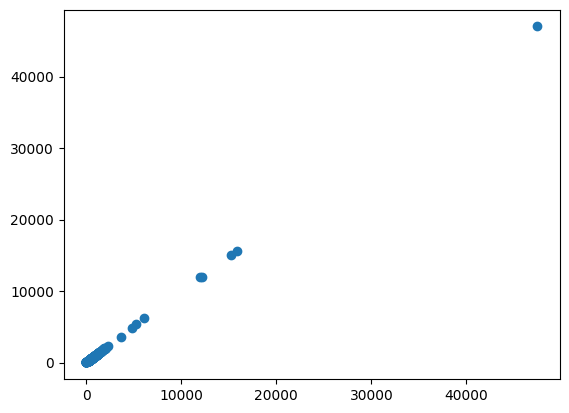

In [59]:
plt.scatter(x= df['Open'],  y = df['LTP'])
plt.show()

In [60]:
# 
X_var = 'Open'
Y_var = 'LTP'

In [61]:
X = df[[X_var]]  # feature varibale should be always 2d 
Y = df[Y_var]

Train and test

In [62]:
X_train , X_test , Y_train , Y_test = train_test_split(
    X , Y , test_size = 0.2 , random_state = 42
)

In [63]:
print(X_train.shape)
print(Y_train.shape)


(264, 1)
(264,)


In [64]:
model = LinearRegression()

In [65]:
#Training data 
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
Y_pred =  model.predict(X_test)

In [67]:
Y_pred

array([ 696.61888768,  697.60929542, 1812.80841744,  283.61885759,
        817.44863269, 1137.35033466,   19.5761525 , 1301.75802049,
         19.42759134, 1249.26640996,   19.03142824,  292.82964963,
        455.94980539,   19.29883833,   20.16049307,  291.64116033,
         19.01162008,  389.09728254,  506.55964122,  605.50137504,
       1201.23163427,  485.66203778,  693.84574599,  706.52296514,
        250.93540197,  187.15314313,   19.72471366,  857.16398331,
         18.98190785,  497.54693073,  919.75775285,  532.31024261,
         18.72440184,  495.56611524,  327.69200229,   18.80363446,
        321.25435194,  552.01935676,  590.64525885,  441.0936892 ,
       2286.22332004, 1253.62420404,  168.73155905,   18.51641621,
        896.68125237,  488.63326101,  196.46297594,  868.94983548,
        624.31912222,  707.51337288,  235.980245  ,  478.72918355,
        682.35701613,  767.92824539,  317.98600637, 1070.1016487 ,
        456.94021314,  443.56970857,  805.36565819,   18.56593

In [68]:

beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(f'Intercept : {beta_0}')
print(f'Slope : {beta_1}')

Intercept : 10.266319686160614
Slope : 0.9904077460184737


Calculate Metrics

In [69]:
rmse =  np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred) 


In [70]:
print(f'RMSE : {rmse}')  #best when less than 100000
print(f'R2 score : {r2}')  #best when between 40-50 -> its only 9%



RMSE : 13.874198904919552
R2 score : 0.998994031568749


Plot 

Text(0.5, 1.0, 'Open with LTP')

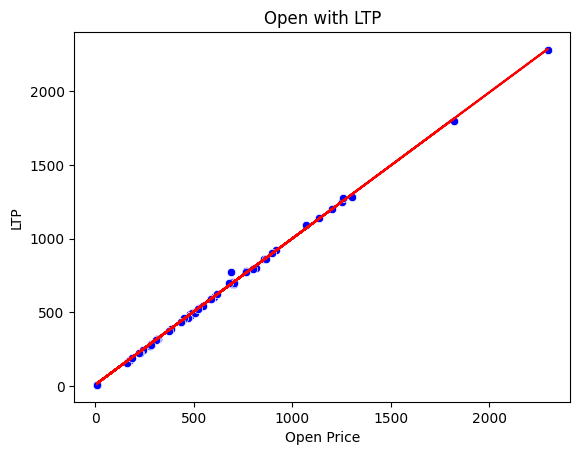

In [71]:
sns.scatterplot(x=X_test[X_var], y=Y_test, color ='blue')
plt.plot(X_test[X_var],Y_pred, color = 'red')

plt.xlabel("Open Price")
plt.ylabel("LTP")
plt.title('Open with LTP')

Text(0.5, 1.0, 'Residual Plot')

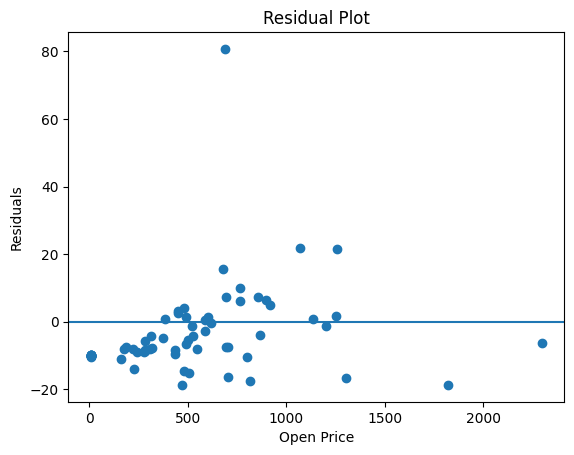

In [72]:
#Plot resideuals
residuals = Y_test - Y_pred
plt.scatter(x = X_test[X_var], y= residuals)
plt.axhline(0)
plt.xlabel("Open Price")
plt.ylabel("Residuals")
plt.title('Residual Plot')

Predict for new open

In [73]:
Open_new = {
    'Open' : [500,550,600,650]
}

In [74]:
# its a feature so it should be on 2d
X_new = pd.DataFrame(Open_new)
X_new

,Open
0,500
1,550
2,600
3,650


In [75]:
Y_pred_new = model.predict(X_new)
Y_pred_new

array([505.4701927, 554.99058  , 604.5109673, 654.0313546])

In [76]:
X_new['Predicted LTP'] = Y_pred_new
X_new

,Open,Predicted LTP
0,500,505.470193
1,550,554.990580
2,600,604.510967
3,650,654.031355
